In [1]:
from music21 import *
import os
import xml.etree.ElementTree as ET

In [2]:
# configure.run()

In [3]:
mscore_path = '/Applications/MuseScore 4.app/Contents/MacOS/mscore'
us = environment.UserSettings()
us['musicxmlPath'] = mscore_path
us['musescoreDirectPNGPath'] = mscore_path

In [4]:
data_path = './SymbTr'
music_xml_path = os.path.join(data_path, 'MusicXML')
music_xml_nokeysig_path = os.path.join(data_path, 'MusicXML_NoKeySig')

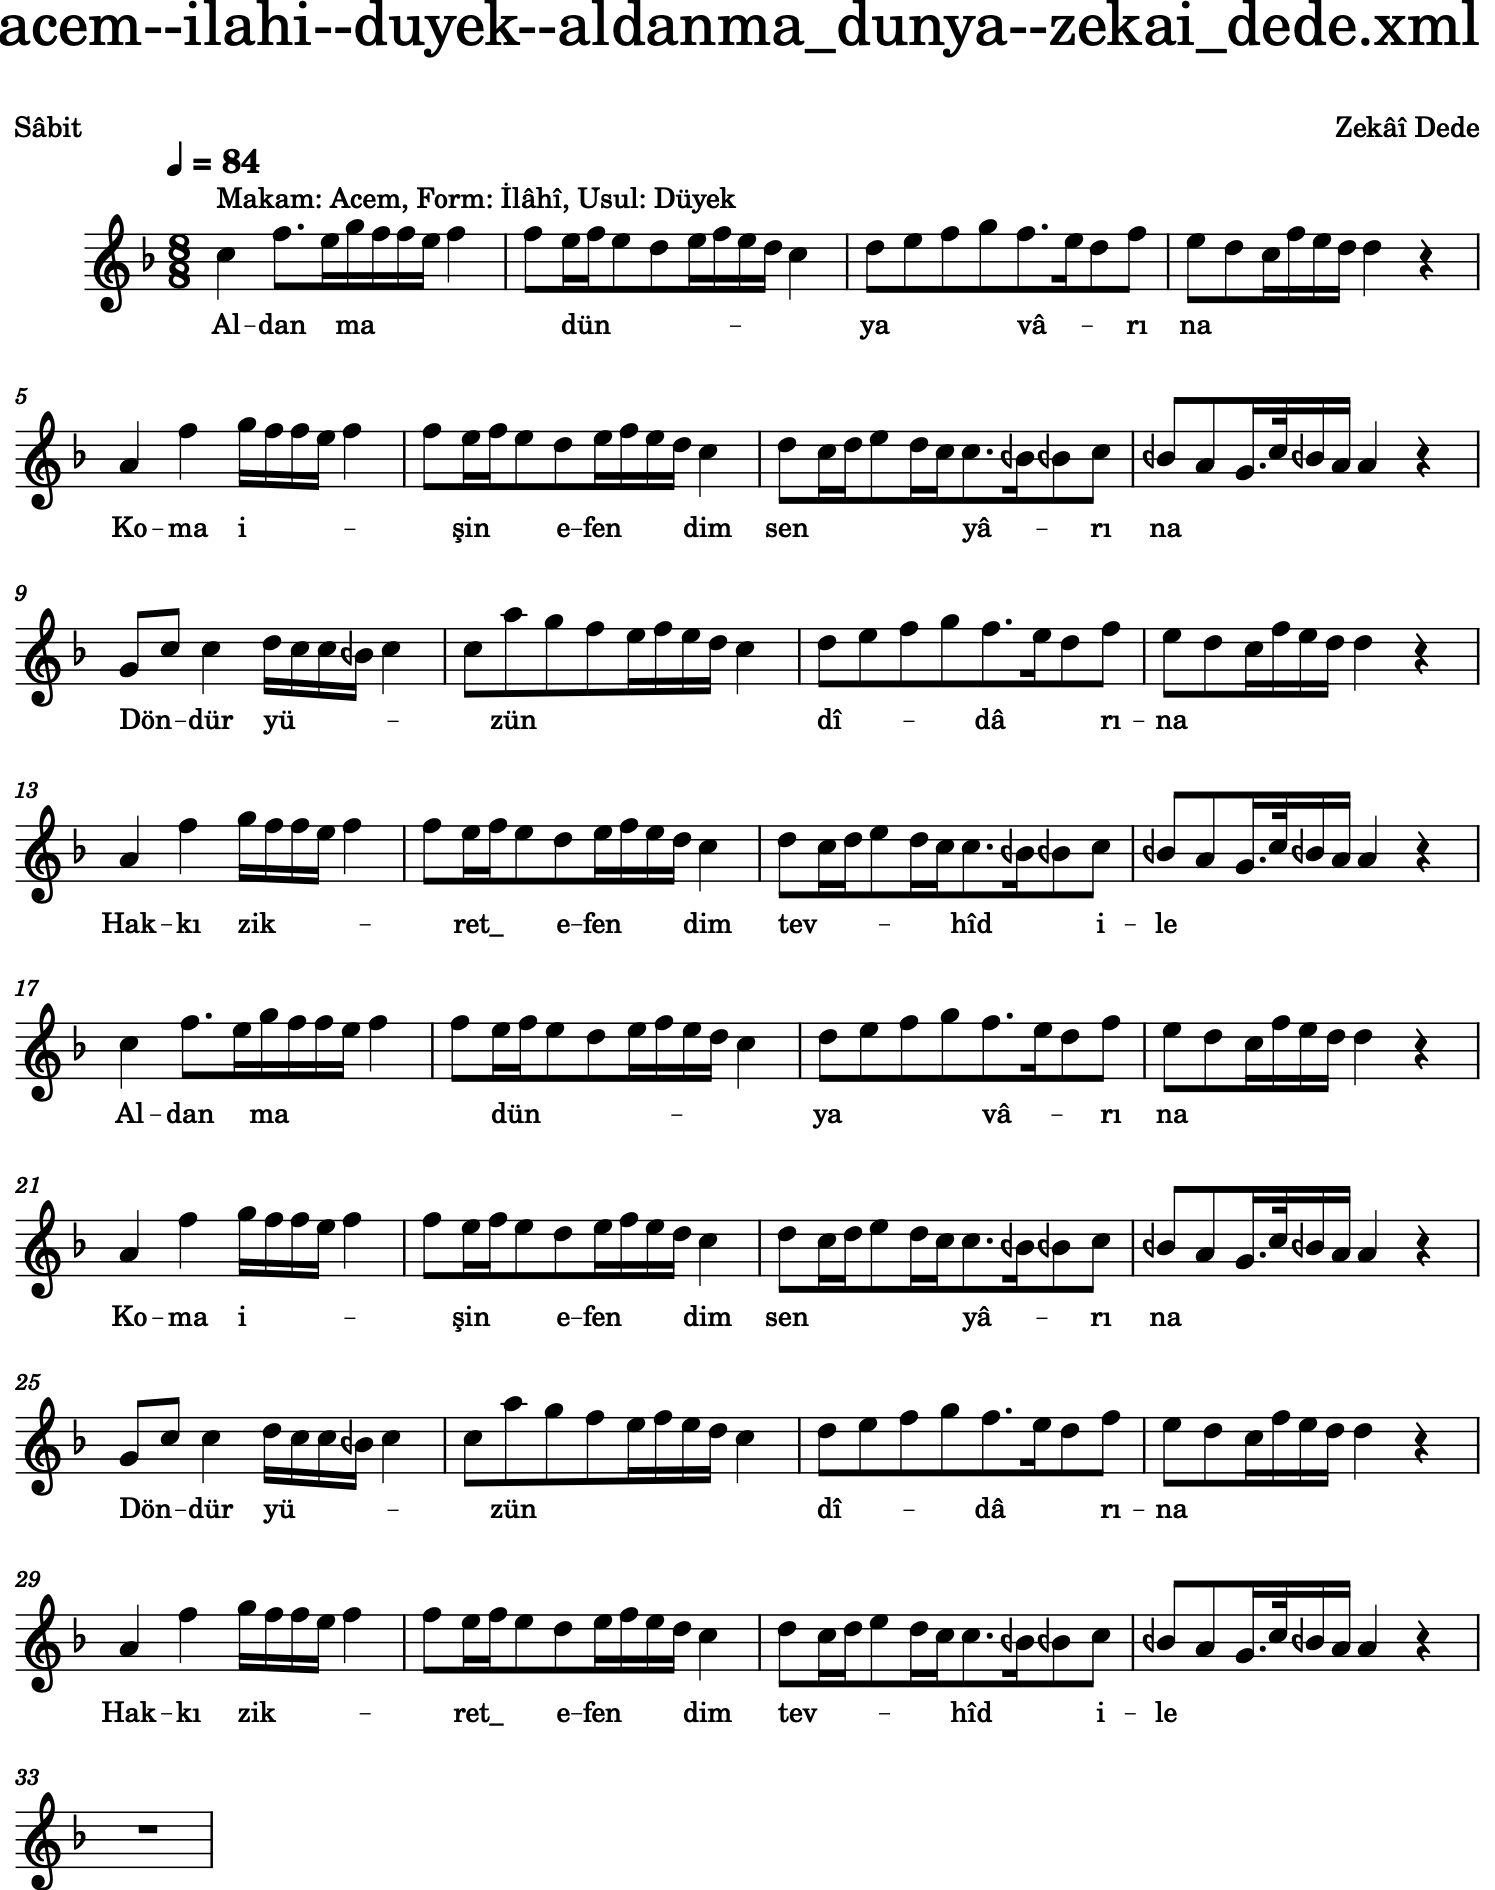

In [5]:
s = converter.parse(music_xml_path + '/acem--ilahi--duyek--aldanma_dunya--zekai_dede.xml')
s.show()

In [6]:
all_scores = os.listdir(music_xml_path)
label_map = {}
for score in all_scores:
    label = score.split('--')[2]
    if label not in label_map:
        label_map[label] = []
    label_map[label].append(score)

In [7]:
sorted_items = sorted(label_map.items(), key=lambda x: len(x[1]), reverse=True)
for key, value in sorted_items:
  print(key, len(value))

aksak 319
sofyan 293
duyek 278
aksaksemai 128
curcuna 111
agiraksak 108
semai 100
nimsofyan 99
senginsemai 72
turkaksagi 64
yuruksemai 62
devrihindi 58
yuruksemai_ii 55
kapali_curcuna 49
musemmen 38
devrikebir 33
devrirevanihindi 25
muhammes 22
evfer 20
hafif 19
agirduyek 15
ciftesofyan 14
agir_aksaksemai 13
agirevfer 13
raksaksagi 12
oynak 11
devrituran 10
aydin 9
cenber 9
fahte 9
zencir 8
musemmen_ii 8
agircenber 7
azeriyuruksemai 6
cifteduyek 6
darbifetih 5
sarkidevrirevani 5
evsat 5
darb 5
ikizaksak 3
agirsenginsemai 3
durakevferi 3
berefsan 3
lenkfahte 3
devrirevan 3
mevlevievferi 2
aksaksemaievferi 2
bektasidevrirevani 2
murekkepsofyan 2
nimdevir 2
sakil 2
nimevsat 2
dolap 2
remel 2
iki_bir 2
serbest 2
nimhafif 2
frenkcin 2
raksan 2
devrihindi_ii 2
havi 2
firengifer 1
turkdarbi 1
devriaryan 1
raksaksagi_ii 1
bektasiraksi 1
14_4 1
223 1
cengiharbi 1
muasser 1
nimberefsan 1
nimsakil 1
katikofti 1
bulgardarbi 1
devrisureyyasofyani 1
devrisureyya 1
darbeyn 1
yuruksofyan 1
3334 1
devr

In [8]:
if not os.path.exists(music_xml_nokeysig_path):
    beatsDic = {}

    # Create a folder to contain the xml scores without key signature
    os.mkdir(music_xml_nokeysig_path)

    for score in all_scores:
        # print(all_scores.index(score)+1, '- Processing', score)
        
        # Remove the key signature from the xml file
        tree = ET.parse(os.path.join(music_xml_path, score))
        root = tree.getroot()
        
        for att in root.iter('attributes'):
            if att.find('key'):
                att.remove(att.find('key'))
        
        # Save the new xml files to be later loaded with music21
        new_score = os.path.join(music_xml_nokeysig_path, score)
        tree.write(new_score)
        
        # Load the file in music21 and get a stream with all the notes
        s = converter.parse(new_score)
        nn = s.flatten().notes.stream()
        
        # Count the notes per beat
        for n in nn:
            beatsDic[n.beat] = beatsDic.get(n.beat, 0) + 1 # Use the .beat attibute

    print('\nDone!')
else:
    print('The folder', music_xml_nokeysig_path, 'already exists. Skipping the process.')


Done!


In [9]:
all_new_scores = os.listdir(music_xml_nokeysig_path)
new_label_map = {}
for score in all_new_scores:
    label = score.split('--')[2]
    if label not in new_label_map:
        new_label_map[label] = []
    new_label_map[label].append(score)

In [10]:
new_sorted_items = sorted(new_label_map.items(), key=lambda x: len(x[1]), reverse=True)
for key, value in new_sorted_items:
  time_sigs = set()
  for score in value:
    s = converter.parse(music_xml_nokeysig_path + '/' + score)
    time_signature = s.getTimeSignatures()[0].ratioString
    time_sigs.add(time_signature)
  print(key, len(value), time_sigs)

aksak 319 {'9/8', '9/4'}
sofyan 293 {'4/8', '4/4'}
duyek 278 {'8/8', '8/4'}
aksaksemai 128 {'10/8'}
curcuna 111 {'10/8'}
agiraksak 108 {'9/4'}
semai 100 {'3/4', '3/8'}
nimsofyan 99 {'2/4'}
senginsemai 72 {'6/4'}
turkaksagi 64 {'5/8', '5/4'}
yuruksemai 62 {'6/4', '6/8'}
devrihindi 58 {'7/8', '7/4'}
yuruksemai_ii 55 {'6/4', '6/8'}
kapali_curcuna 49 {'10/16', '10/8'}
musemmen 38 {'8/8'}
devrikebir 33 {'14/2', '28/8', '28/4'}
devrirevanihindi 25 {'14/8'}
muhammes 22 {'32/4'}
evfer 20 {'9/8'}
hafif 19 {'32/8', '32/4', '32/2'}
agirduyek 15 {'8/4'}
ciftesofyan 14 {'9/16', '9/8'}
agir_aksaksemai 13 {'10/4'}
agirevfer 13 {'9/4'}
raksaksagi 12 {'9/8'}
oynak 11 {'9/8', '9/4'}
devrituran 10 {'7/8'}
aydin 9 {'9/8'}
cenber 9 {'24/4', '12/2'}
fahte 9 {'20/4'}
zencir 8 {'120/4'}
musemmen_ii 8 {'8/8', '8/16'}
agircenber 7 {'24/2', '12/1'}
azeriyuruksemai 6 {'6/8'}
cifteduyek 6 {'16/4'}
darbifetih 5 {'88/4'}
sarkidevrirevani 5 {'13/4'}
evsat 5 {'26/4', '26/8'}
darb 5 {'6/4'}
ikizaksak 3 {'12/8'}
agirsen